### Q1-->Prepare a prediction model for profit of 50_startups data. Do transformations for getting better predictions of profit andmake a table containing R^2 value for each prepared model.
### R&D Spend -- Research and devolop spend in the past few years
### Administration -- spend on administration in the past few years
### Marketing Spend -- spend on Marketing in the past few years
### State -- states from which data is collected
### Profit  -- profit of each state in the past few years


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [3]:
startup_data=pd.read_csv("C:/Users/samee/OneDrive/Documents/ExcelR/Assignment-5/50_Startups.csv")

In [4]:
startup_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
startup_data.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [6]:
startup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
startup_data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
startup_data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

<AxesSubplot:>

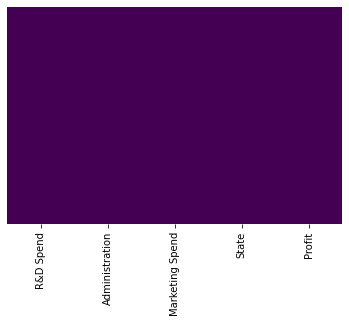

In [9]:
sns.heatmap(startup_data.isnull(),cmap='viridis',cbar=False,yticklabels=False)

In [10]:
startup_data[startup_data.duplicated()].shape
startup_data.shape

(0, 5)

(50, 5)

In [11]:
startup_data.drop_duplicates()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [12]:
startup_data1=startup_data.rename({'R&D Spend':'RDS',
                                  'Marketing Spend':'Marketing_Spend'},axis=1)

In [13]:
startup_data1.head()

,RDS,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [14]:
startup_data1['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [15]:
startup_data1.corr()

,RDS,Administration,Marketing_Spend,Profit
RDS,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

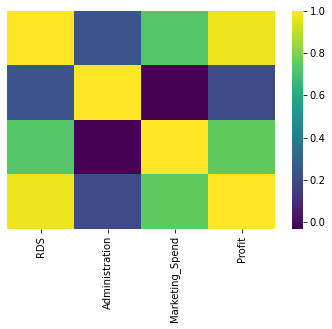

In [16]:
sns.heatmap(startup_data1.corr(),cmap='viridis',cbar=True,yticklabels=False)

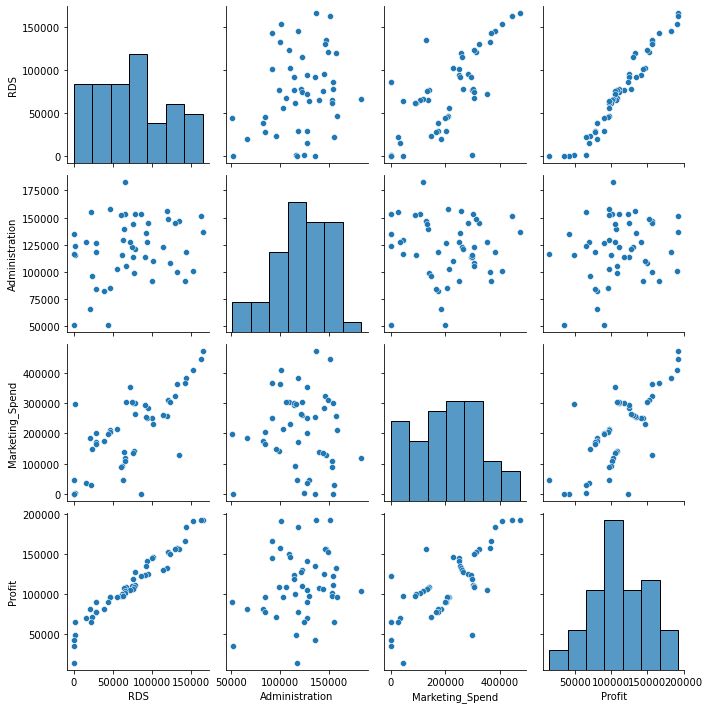

In [17]:
sns.pairplot(startup_data1)

<AxesSubplot:>

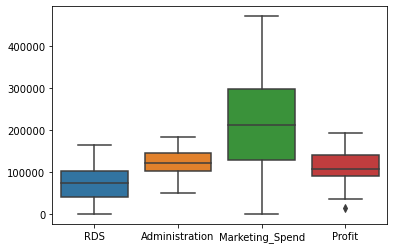

In [18]:
sns.boxplot(data=startup_data1)

(array([6., 6., 4., 7., 8., 5., 3., 5., 3., 3.]),
 array([     0.  ,  16534.92,  33069.84,  49604.76,  66139.68,  82674.6 ,
         99209.52, 115744.44, 132279.36, 148814.28, 165349.2 ]),
 <BarContainer object of 10 artists>)

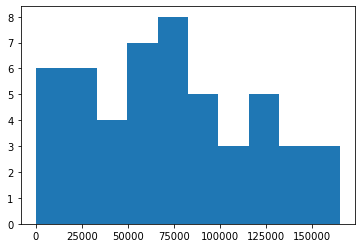

In [19]:
plt.hist(x='RDS',data=startup_data1)

C:\Users\samee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Administration', ylabel='Density'>

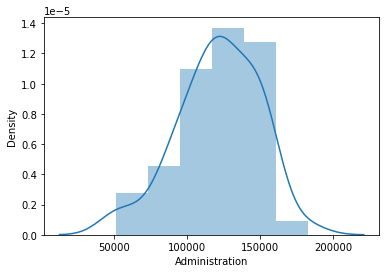

In [20]:
sns.distplot(startup_data1['Administration'])

C:\Users\samee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RDS', ylabel='Density'>

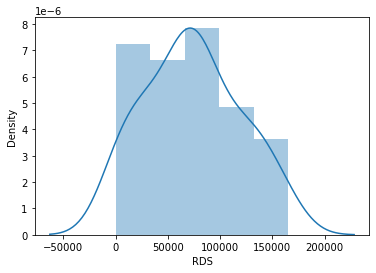

In [21]:
sns.distplot(startup_data1['RDS'])

C:\Users\samee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Marketing_Spend', ylabel='Density'>

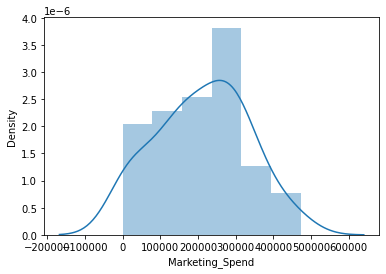

In [22]:
sns.distplot(startup_data1['Marketing_Spend'])

C:\Users\samee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

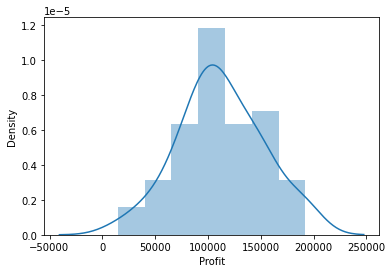

In [23]:
sns.distplot(startup_data1['Profit'])

In [24]:
## Since we have a categorical Column State-->

## We need to convert -

startup_data1['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [25]:
startup_data2=pd.get_dummies(data=startup_data1,columns=['State'])

In [26]:
startup_data2.head()

,RDS,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [27]:
## Above Conversion is just for Categorical Columns,In Model Building , we wont 
## be using state COlumn , so we would be going out with our Data

In [28]:
## Problem Statement-->

##Prepare a prediction model for profit of 50_startups data.

## So y variable-->Profit, x variable-->Others


import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

## Model Building

In [29]:
model=smf.ols('Profit~RDS+Administration+Marketing_Spend',
              data=startup_data1).fit()

## Model Testing

In [30]:
model.params

Intercept          50122.192990
RDS                    0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [31]:
model.pvalues,model.tvalues

(Intercept          1.057379e-09
 RDS                2.634968e-22
 Administration     6.017551e-01
 Marketing_Spend    1.047168e-01
 dtype: float64,
 Intercept           7.626218
 RDS                17.846374
 Administration     -0.525507
 Marketing_Spend     1.655077
 dtype: float64)

In [32]:
(model.rsquared, model.rsquared_adj) 

(0.9507459940683246, 0.9475337762901719)

In [33]:
## Model Accuracy is 94.75%

### Checking Individual Factors

In [34]:
model_adms=smf.ols('Profit~Administration',data=startup_data1).fit()
model_adms.tvalues,model_adms.pvalues         ## in-significant pvalue

(Intercept         3.040044
 Administration    1.419493
 dtype: float64,
 Intercept         0.003824
 Administration    0.162217
 dtype: float64)

In [35]:
model_adms.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Thu, 28 Apr 2022   Prob (F-statistic):              0.162
Time:                        10:00:45   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
model_rds=smf.ols('Profit~RDS',data=startup_data1).fit()
model_rds.tvalues,model_rds.pvalues

(Intercept    19.320288
 RDS          29.151139
 dtype: float64,
 Intercept    2.782697e-24
 RDS          3.500322e-32
 dtype: float64)

In [37]:
model_mkts=smf.ols('Profit~Marketing_Spend',data=startup_data1).fit()
model_mkts.tvalues,model_mkts.pvalues

(Intercept          7.808356
 Marketing_Spend    7.802657
 dtype: float64,
 Intercept          4.294735e-10
 Marketing_Spend    4.381073e-10
 dtype: float64)

In [38]:
model_adm_mkt=smf.ols('Profit~Administration+Marketing_Spend',
                      data=startup_data1).fit()
model_adm_mkt.tvalues,model_adm_mkt.pvalues

(Intercept          1.142741
 Administration     2.467779
 Marketing_Spend    8.281039
 dtype: float64,
 Intercept          2.589341e-01
 Administration     1.729198e-02
 Marketing_Spend    9.727245e-11
 dtype: float64)

## Model Validation

### Collinearity Check

In [39]:
## Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_rds=smf.ols('RDS~Administration+Marketing_Spend',data=startup_data1).fit().rsquared
vif_rds=1/(1-rsq_rds)

rsq_adm=smf.ols('Administration~RDS+Marketing_Spend',data=startup_data1).fit().rsquared
vif_adm=1/(1-rsq_adm)

rsq_mkt=smf.ols('Marketing_Spend~Administration+RDS',data=startup_data1).fit().rsquared
vif_mkt=1/(1-rsq_mkt)

d1={'Variables':['RDS','ADMS','MKTS'],'Vif':[vif_rds,vif_adm,vif_mkt]}

Vif_frame=pd.DataFrame(d1)
Vif_frame

,Variables,Vif
0,RDS,2.468903
1,ADMS,1.175091
2,MKTS,2.326773


### Residual Analysis

C:\Users\samee\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


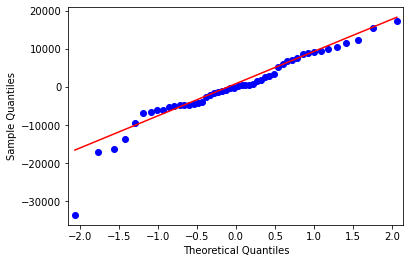

Text(0.5, 1.0, 'Residual Plot')

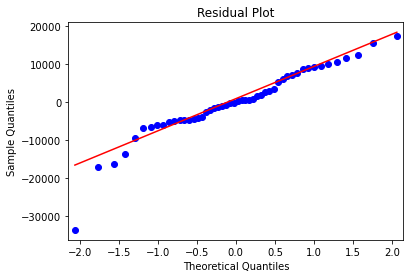

In [40]:
sm.qqplot(model.resid,line='q')
plt.title('Residual Plot')
plt.show()

In [41]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [42]:
## Test for Homoscedasticity

In [43]:
def standard_values(vals):
    return (vals-vals.mean())/vals.std     ## z-value= (x-mu)/sigma

In [44]:
##plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
##plt.title('Residual Plot')
##plt.xlabel('standardized fitted values')
##plt.ylabel('standardized residual values')
##plt.show() 

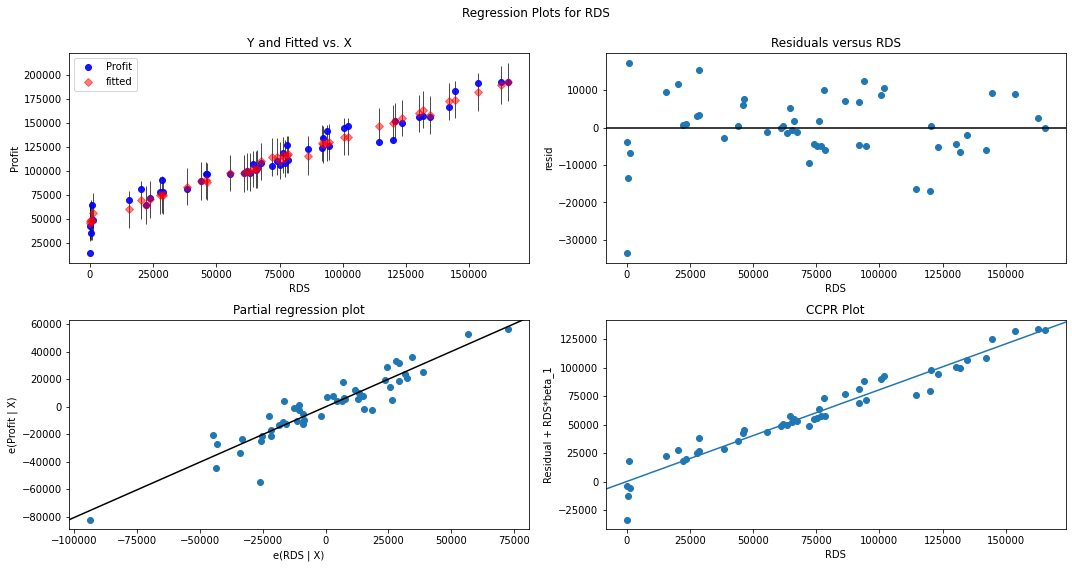

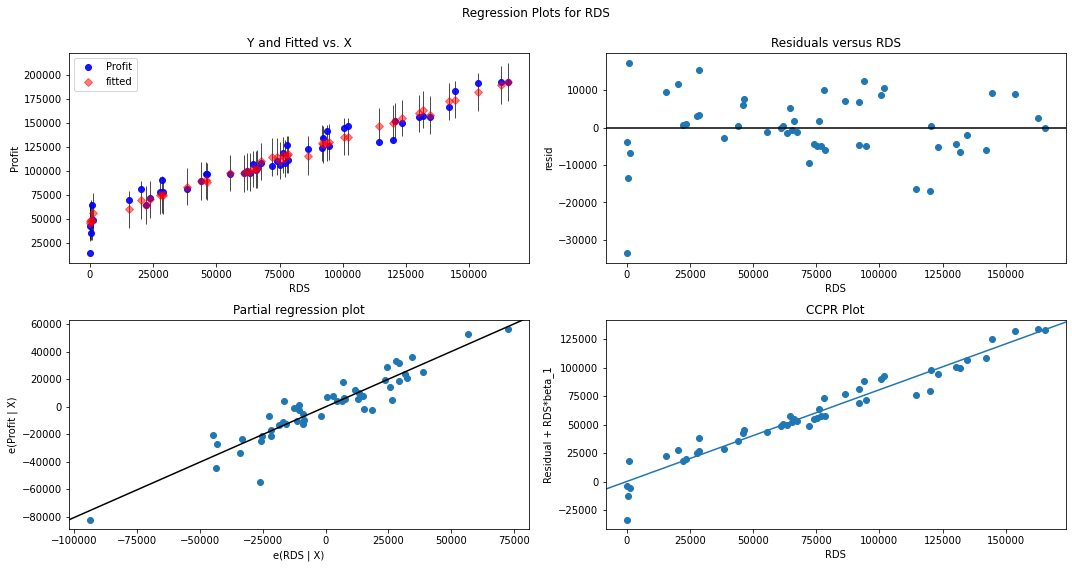

In [45]:
## Regressors vs Residuals (## Regressors-->response VAriable)

fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"RDS",fig=fig)


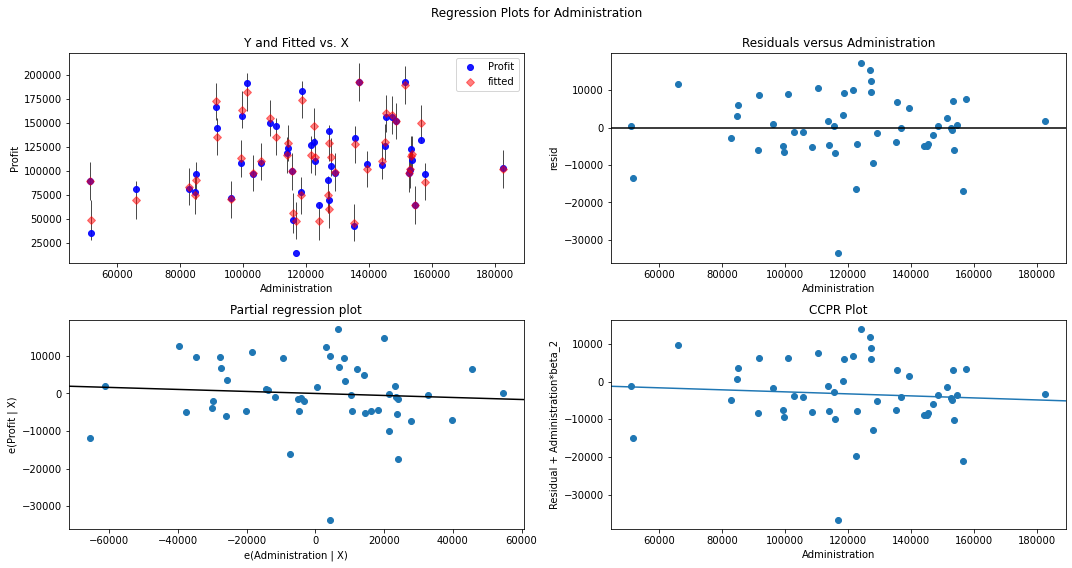

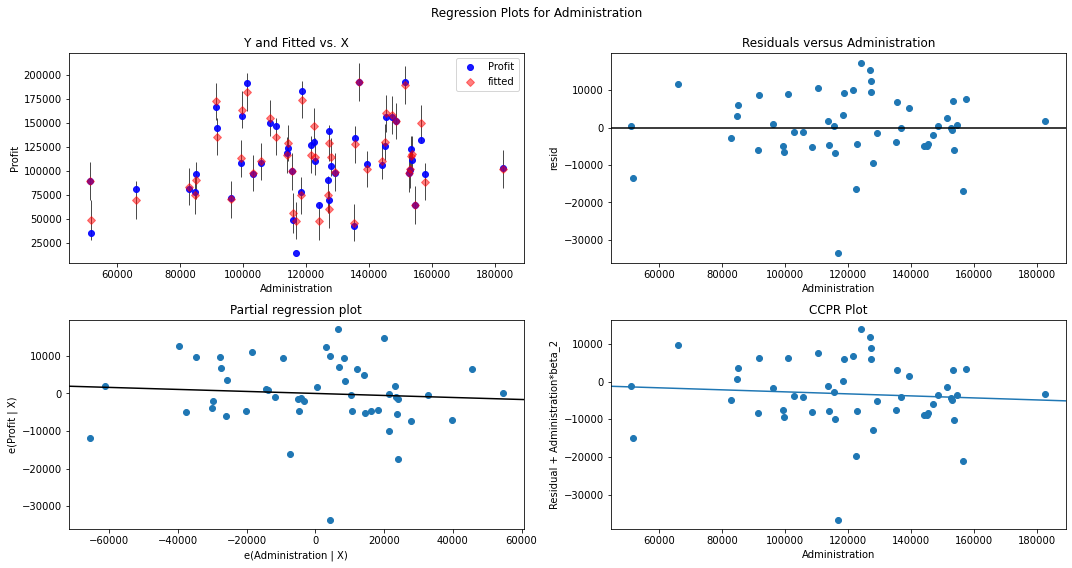

In [46]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Administration',fig=fig)
plt.show()

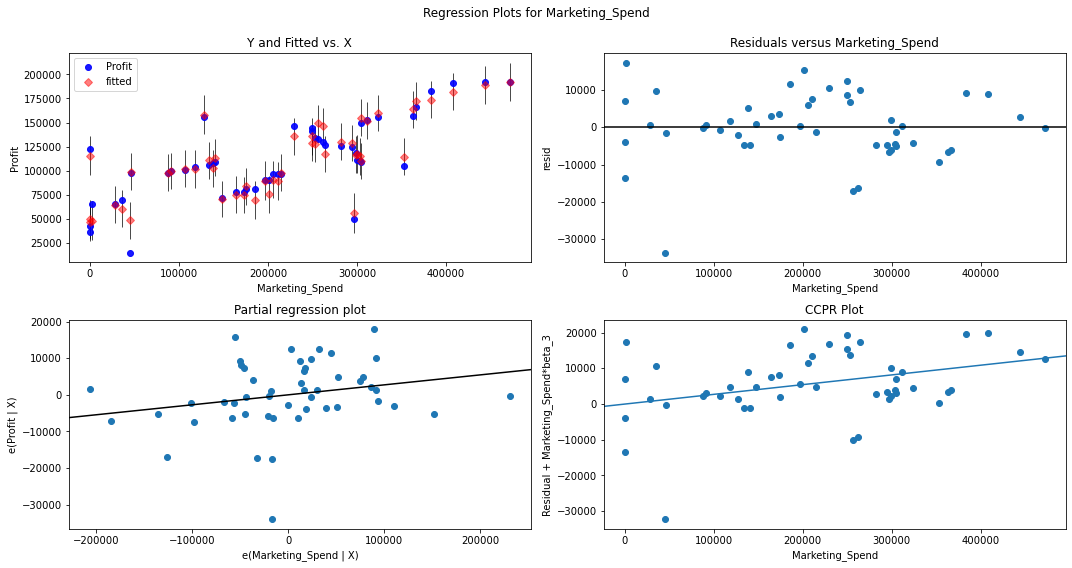

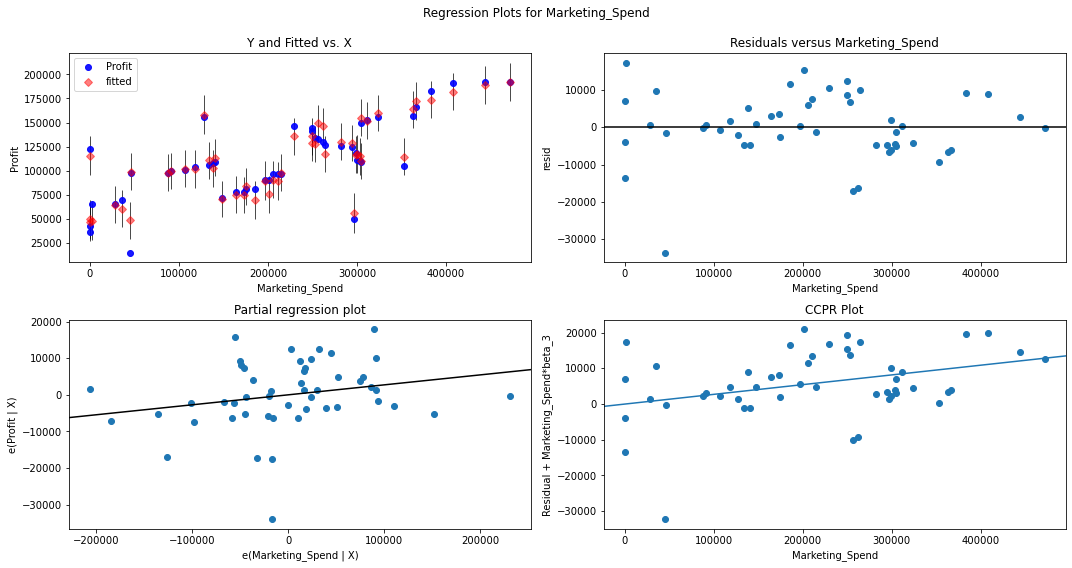

In [47]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Marketing_Spend',fig=fig)
plt.show()

## Model Deletion Diagnostics

### Cooks Distance

In [48]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance

(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

<StemContainer object of 3 artists>

Text(0.5, 0, 'Row Index')

Text(0, 0.5, 'Cooks Distance')

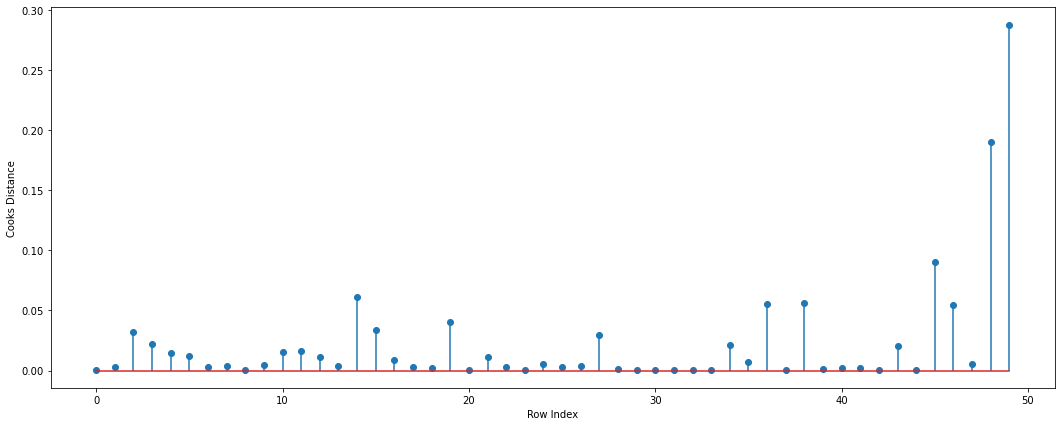

In [49]:
## Plotting using Stem Plot

fig=plt.figure(figsize=(18,7))
plt.stem(np.arange(len(startup_data1)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [50]:
# Index and value of influencer where C>0.5

np.argmax(c) , np.max(c)

(49, 0.28808229275432634)

### Leverage

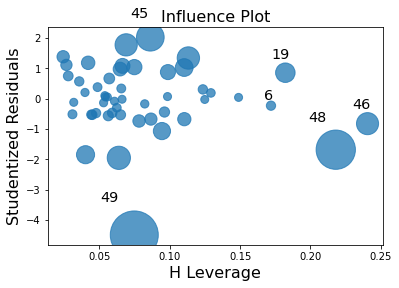

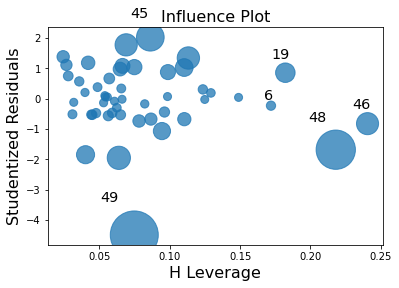

In [51]:
## Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers

influence_plot(model)
plt.show()

In [52]:
# Leverage Cuttoff Value = 3*(k+1)/n ;
##k = no.of features/columns & n = no. of datapoints

k=startup_data1.shape[1]
n=startup_data1.shape[0]


leverage_cutoff=(3*(k+1))/n
leverage_cutoff

0.36

In [53]:
startup_data1[startup_data1.index.isin([49])]

,RDS,Administration,Marketing_Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


## Improving the Model

In [54]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))

startup_data3=startup_data1.drop(startup_data1.index[[49]],axis=0)
startup_data3.reset_index(drop=True)

,RDS,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## Model Deletion Diagnostics and Final Model

In [55]:
while np.max(c) >0.5 :
    model=smf.ols("Profit~RDS+Administration+Marketing_Spend",data=data2).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c),np.max(c)
    startup_data3=data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    startup_data3
    
else:
    final_model=smf.ols("Profit~RDS+Administration+Marketing_Spend",data=startup_data3).fit()
    final_model.rsquared, final_model.aic
    print('Model Accuracy Improved to',final_model.rsquared)

(0.9613162435129847, 1020.5652974526367)

Model Accuracy Improved to 0.9613162435129847


## Model Prediction

In [56]:
new_data=pd.DataFrame({'RDS':45000,'Administration':55000,'Marketing_Spend':60000},
                     index=[0])
new_data

,RDS,Administration,Marketing_Spend
0,45000,55000,60000


In [57]:
## manual Prediction

final_model.predict(new_data)

0    87910.465806
dtype: float64

In [58]:
## Automatic Prediction

pred_y=final_model.predict(startup_data3)
pred_y.head()

0    190716.676999
1    187537.122227
2    180575.526396
3    172461.144642
4    170863.486721
dtype: float64

## Table containing R^2 value for each prepared model

In [59]:
d2={'Models':['Model','Final_Model'],'RSquared':[model.rsquared,final_model.rsquared]}

op_table=pd.DataFrame(d2)
op_table

,Models,RSquared
0,Model,0.950746
1,Final_Model,0.961316


In [60]:
startup_data3.head()

,RDS,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Model Evaluation

In [61]:
Y=startup_data3.iloc[:,-1]
X=startup_data3.iloc[:,0:3]

X.head()

,RDS,Administration,Marketing_Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [62]:
Y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [63]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [64]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
regressor.fit(X,Y)

LinearRegression()

In [65]:
Y_pred=regressor.predict(X_test)
print(Y_pred)
print(Y_test)

[103057.62176061 170863.48672087 111547.63893525 100656.41022682
 100325.74133468  90722.50324366  90552.30780938  76625.51030344
 159347.73531837 135507.7926824 ]
29    101004.64
4     166187.94
26    105733.54
30     99937.59
32     97427.84
37     89949.14
34     96712.80
40     78239.91
7     155752.60
10    146121.95
Name: Profit, dtype: float64


In [66]:
from sklearn.metrics import mean_squared_error

In [67]:
print("RMSE",np.sqrt(mean_squared_error(Y_test,Y_pred)))

RMSE 4853.196132233677


##  Log Transformation

In [68]:
y_name=startup_data3['Profit']
x_names=startup_data3.iloc[:,0:3]

In [69]:
df_log=startup_data3.copy()

In [70]:
df_log['log_Profit']=np.log(startup_data3['Profit'])

In [71]:
df_log.head()

,RDS,Administration,Marketing_Spend,State,Profit,log_Profit
0,165349.20,136897.80,471784.10,New York,192261.83,12.166613
1,162597.70,151377.59,443898.53,California,191792.06,12.164167
2,153441.51,101145.55,407934.54,Florida,191050.39,12.160292
3,144372.41,118671.85,383199.62,New York,182901.99,12.116706
4,142107.34,91391.77,366168.42,Florida,166187.94,12.020875


In [72]:
model_log=smf.ols('log_Profit~startup_data3.iloc[:,0:3]',data=df_log).fit()

In [73]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_Profit   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     128.7
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           4.31e-22
Time:                        10:00:57   Log-Likelihood:                 34.801
No. Observations:                  49   AIC:                            -61.60
Df Residuals:                      45   BIC:                            -54.04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        10.9256      0.089    123.151      0.000      10.747      11.104
startup_data3.iloc[:, 0:3][0]  7.246e-06   6.12e-07     11.834      0.000    6.01e-06    8.48e-06
startup_data3.iloc[:, 0:3][1]  4.864e-07   6.86e-07      0.709      0.482   -8.96e-07    1.87e-06
startup_data3.iloc[:, 0:3][2]  2.445e-07   2.21e-07      1.105      0.275   -2.01e-07     6.9e-07
==============================================================================
Omnibus:                       29.355   Durbin-Watson:                   0.641
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.144
Skew:                          -1.748   Prob(JB):                     5.28e-14
Kurtosis:                       7.211   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
d3={'Models':['Model','Final_Model','Log_Transformed_Model'],'RSquared':[model.rsquared,final_model.rsquared,
                                                                         model_log.rsquared]}

f_op_table=pd.DataFrame(d3)
f_op_table

,Models,RSquared
0,Model,0.950746
1,Final_Model,0.961316
2,Log_Transformed_Model,0.895587


In [75]:
## Here we can see there is a decrease in R squared values when Log 
## Transformation is done , so we reject Log Transformation in this case and 
## Accept out true Model R-Squared value=0.961